# 第３章　分類問題ー機械学習ライブラリscikit-learnの活用
- よく使用される分類アルゴリズムの概念
- scikit-learn機械学習ライブラリの使用法
- 機械学習アルゴリズムを選択するときに生じる疑問

# 3.1 分類アルゴリズムの
アルゴリズムにはそれぞれ癖があり、いくつかの学習アルゴリズムの性能を比較し、特定の問題に最適なモデルを選択することが常に推奨される。機械学習アルゴリズムのトレーニングには、以下の主要な５ステップから構成される。
- 特徴量を選択する。
- 性能指標を選択する
- 分類器と最適化アルゴリズムを選択する。
- モデルの性能を評価する。
- アルゴリズムを調整する。

# 3.2 scikit-learn活用へのファーストステップ

# 3.2.1　scikit-learnを使ったパーセプトンのトレーニング

In [1]:
from sklearn import datasets
import numpy as np
#Irisデータをロード
iris = datasets.load_iris()
#特徴量を抽出
X = iris.data[:,[2,3]]
#クラスラベルを取得
y = iris.target

In [2]:
from sklearn.cross_validation import train_test_split
# トレーニングデータに分割する。
# 全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
#平均と標準偏差を用いて計算
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- テストデータを標準化するのに同じスケーリングパラメータを使用していることに注意する。これはトレーニングデータセットとテストデータセットの値を相互に比較できるようにするためだ。

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40,eta0=0.1,random_state=0,shuffle=True)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
y_pred = ppn.predict(X_test_std)
#誤分類のサンプルの個数お表示
print('Misclassified samples: %d') %(y_test != y_pred).astype(int).sum()

Misclassified samples: 4


- scikit-learnには様々な性能指標も実装されている。

In [6]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f') % accuracy_score(y_test,y_pred)

Accuracy: 0.91


In [53]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','grey','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #yの種類分色を用意する
    
    #決定領域のプロット
    x1_min, x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測値結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #　グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #　軸の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        
    #テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidths=1,marker='o',
                   s=55,label='test set')
        
    

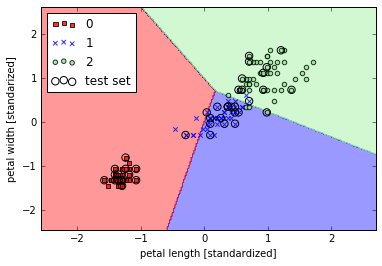

In [56]:
#トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standarized]')

plt.legend(loc='upper left')
plt.show()